[ 11.32899055  11.32899055  11.32899055   8.10930216   6.72944473
   6.00209185   5.40054274   5.40054274   3.97701717   2.26657371
   0.          -4.46287103  -7.42127363 -12.32372279 -18.8321708
 -24.75748712 -42.40527072]


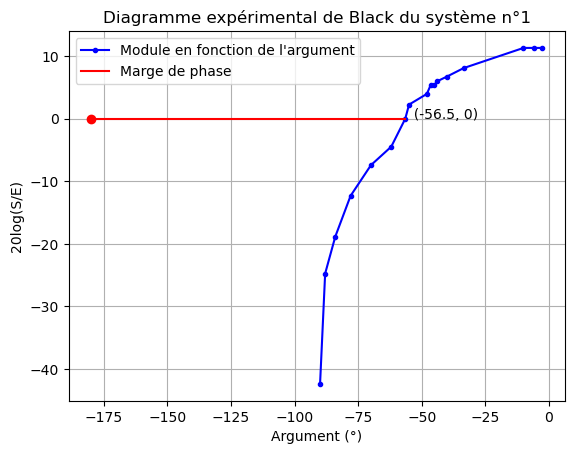

In [22]:
from math import*
import numpy as np 
import matplotlib.pyplot as plt

x = [-2.68,-5.75,-10,-33.5,-40.2,-43.9,-45,-46.5,-48,-55,-56.5,-62,-70,-78,-84,-88,-90]
y = [1.762,1.762,1.762,1.5,1.4,1.35,1.31,1.31,1.22,1.12,1,0.8,0.69,0.54,0.39,0.29,0.12]
plt.plot(x,20*np.log(y), 'b.-', label = "Module en fonction de l'argument")
plt.title('Diagramme expérimental de Black du système n°1')
plt.xlabel('Argument (°)')
plt.ylabel('20log(S/E)')
x2=[-180,-56.5]
y2 = [0,0]
plt.plot(x2,y2,'r', label = 'Marge de phase')
plt.plot(-180,0,'ro')
print(20*np.log(y))
plt.grid()
plt.text(-56.5,0,'  (-56.5, 0)')
plt.legend()


[ 13.35658745  13.35658745  13.86294361  14.10151503  14.83874689
  15.21611658  16.30729627  15.85985031  14.06195023  13.35658745
  12.08631934   5.24728529   0.         -11.24237836 -28.54232711
 -39.32225713 -53.18520074 -75.44522126]


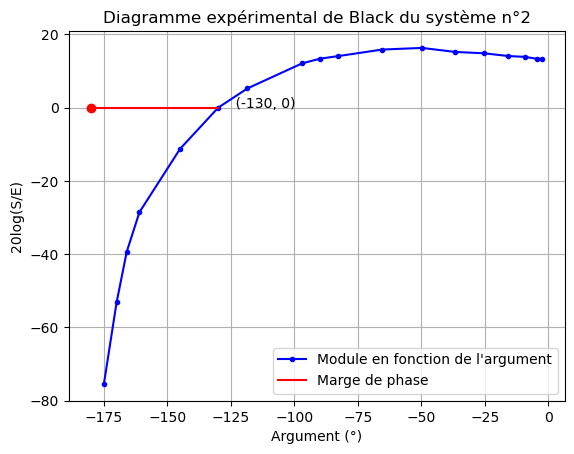

In [23]:
x = [-2.51,-4.7,-9.32,-15.95,-25.33,-36.8,-49.8,-65.47,-82.9,-90,-97,-118.5,-130,-145,-161,-166,-170,-175]
y = [1.95,1.95,2,2.024,2.1,2.14,2.26,2.21,2.02,1.95,1.83,1.30,1,0.57,0.24,0.14,0.07,0.023]
plt.plot(x,20*np.log(y), 'b.-', label = "Module en fonction de l'argument")
plt.title('Diagramme expérimental de Black du système n°2')
plt.xlabel('Argument (°)')
plt.ylabel('20log(S/E)')
x2=[-180,-130]
y2 = [0,0]
plt.plot(x2,y2,'r', label = 'Marge de phase')
plt.plot(-180,0,'ro')
print(20*np.log(y))
plt.grid()
plt.text(-130,0,'    (-130, 0)')
plt.legend()

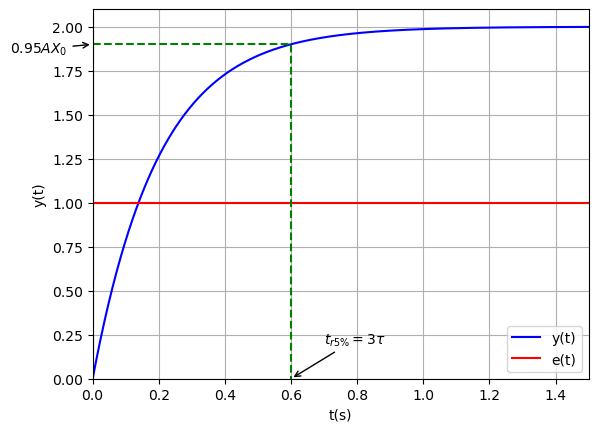

In [24]:
def y(t):
    return 2*(1 - np.exp(-t*5))

def rep_indic():
    abscisse = np.linspace(0,1.5,1000)
    ordonnee = np.zeros(1000)
    for k in range(1000):
        ordonnee[k] = y(abscisse[k])
    plt.plot(abscisse,ordonnee,'b', label = 'y(t)')
    plt.grid()
    x2 = np.ones(1000)
    plt.plot(abscisse,x2, 'r',label = 'e(t)')
    plt.xlim(0,1.5)
    plt.ylim(0,2.1)
    plt.xlabel('t(s)')
    plt.ylabel('y(t)')
    x3 = [0,0.6,0.6]
    y3 = [1.9,1.9,0]
    plt.plot(x3,y3,'g--')
    plt.legend()
    plt.annotate(r"$t_{r5\%} = 3\tau$", xy=(0.6,0),
    xytext=(0.7,0.2),
    arrowprops=dict(facecolor='black',
    arrowstyle='->'))
    plt.annotate(r"$0.95AX_0$", xy=(0,1.9),
    xytext=(-0.25,1.85),
    arrowprops=dict(facecolor='black',
    arrowstyle='->'))

rep_indic()




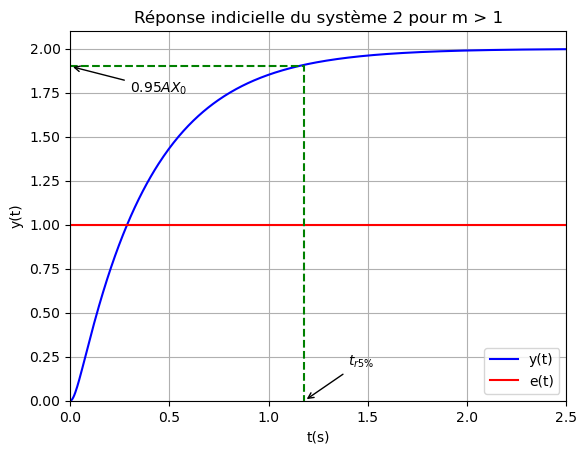

In [25]:
def y2(t,m):
    A = 2
    X0 = 1
    w0 = 10
    p1 = w0*(-m+np.sqrt(m**2-1))
    p2 = w0*(-m-np.sqrt(m**2-1)) 
    A1 = w0**2/(p1*(p1-p2))
    A2 = w0**2/(p2*(p2-p1))
    return A*X0*(1 + A1*np.exp(t*p1) + A2*exp(t*p2))

def rep_indic2(m):
    abscisse = np.linspace(0,5,1000)
    ordonnee = np.zeros(1000)
    for k in range(1000):
        ordonnee[k] = y2(abscisse[k],m)
    plt.plot(abscisse,ordonnee,'b', label = 'y(t)')
    plt.grid()
    plt.xlabel('t(s)')
    plt.ylabel('y(t)')
    plt.xlim(0,2.5)
    plt.ylim(0,2.1)
    x2 = np.ones(1000)
    plt.plot(abscisse,x2, 'r',label = 'e(t)')
    plt.title('Réponse indicielle du système 2 pour m > 1')
    x3 = [0,1.18,1.18]
    y3 = [1.9,1.9,0]
    plt.plot(x3,y3,'g--')
    plt.legend()
    plt.annotate(r"$t_{r5\%}$", xy=(1.18,0),
    xytext=(1.4,0.2),
    arrowprops=dict(facecolor='black',
    arrowstyle='->'))
    plt.annotate(r"$0.95AX_0$", xy=(0,1.9),
    xytext=(0.3,1.75),
    arrowprops=dict(facecolor='black',
    arrowstyle='->'))

rep_indic2(2)


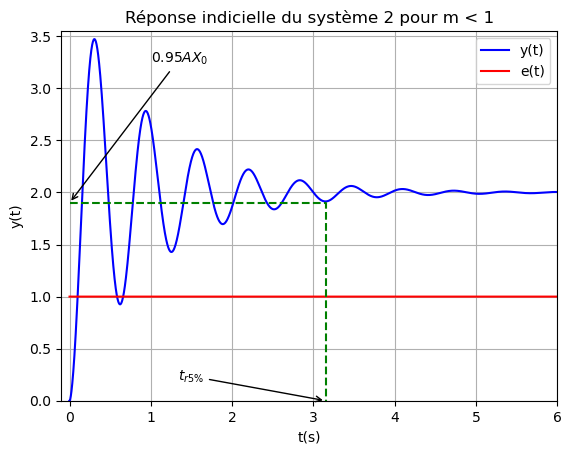

In [26]:
def y4(t,m):
    if t==0:
        U = 0
    elif t>0 :
        U= 1
    A = 2
    X0 = 1
    w0 = 10
    alpha = -m*w0
    beta = w0*np.sqrt(1-m**2)
    theta = np.arctan(alpha/beta**4) - pi
    A1 = w0**2/np.sqrt(4*beta**4 + (2*beta*alpha)**2)
    
    return A*X0*(1 + 2*A1*np.exp(t*alpha)*np.cos(beta*t + theta))*U

def rep_indic3(m):
    abscisse = np.linspace(0,6,3000)
    ordonnee = np.zeros(3000)
    for k in range(3000):
        ordonnee[k] = y4(abscisse[k],m)
    plt.plot(abscisse,ordonnee,'b', label = 'y(t)')
    plt.grid()
    plt.xlim(-0.1,6)
    plt.ylim(0,3.55)
    abc = np.ones(3000)
    plt.plot(abscisse,abc, 'r',label = 'e(t)')
    plt.legend()
    plt.xlabel('t(s)')
    plt.ylabel('y(t)')
    plt.title('Réponse indicielle du système 2 pour m < 1')
    w = [0,3.15,3.15]
    z = [1.9,1.9,0]
    plt.plot(w,z,'g--')
    plt.annotate(r"$t_{r5\%}$", xy=(3.15,0),
    xytext=(1.33,0.2),
    arrowprops=dict(facecolor='black',
    arrowstyle='->'))
    plt.annotate(r"$0.95AX_0$", xy=(0,1.9),
    xytext=(1,3.25),
    arrowprops=dict(facecolor='black',
    arrowstyle='->'))

   
    

rep_indic3(0.1)

Text(0.5, 1.0, 'Caractéristique statique du système 1')

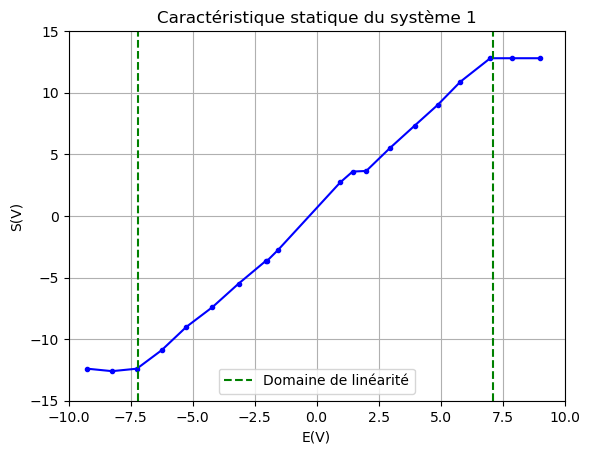

In [27]:
    carac_absc1 = [-9.25,-8.25,-7.25,-6.25,-5.25,-4.2,-3.15,-2.05,-2,-1.55,0.95,1.45,2,2.95,3.95,4.875,5.8,7,7.87,9]
    carac_ord1 = [-12.4,-12.6,-12.4,-10.9,-9,-7.4,-5.5,-3.65,-3.65,-2.75,2.72,3.60 ,3.65,5.5,7.325,9,10.9,12.8,12.8,12.8]
    plt.plot(carac_absc1,carac_ord1,'b.-')
    plt.grid()
    plt.plot([-7.2,-7.2],[-15,15],'g--')
    plt.plot([7.1,7.1],[-15,15],'g--',label ='Domaine de linéarité')
    plt.xlabel('E(V)')
    plt.ylabel('S(V)')
    plt.xlim(-10,10)
    plt.ylim(-15,15)
    plt.legend()
    plt.title('Caractéristique statique du système 1')

Text(0.5, 1.0, 'Caractéristique statique du système 2')

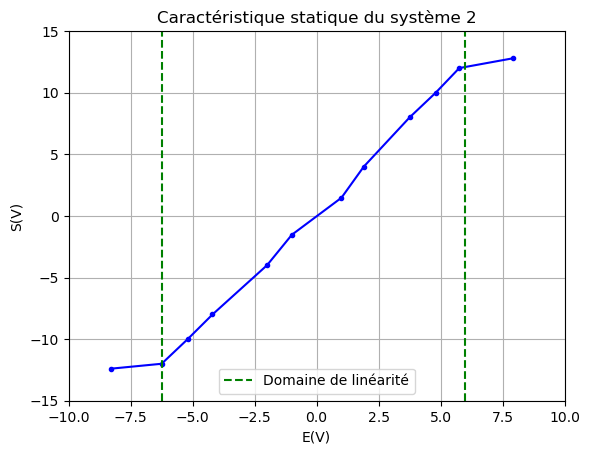

In [28]:
carac_absc2 = [-8.3,-6.25,-5.2,-4.2,-2,-1,1,1.9,3.75,4.8,5.75,7.93]
carac_ord2 = [-12.4,-12,-10,-8,-4,-1.53,1.475,4,8,10,12,12.8]
plt.plot(carac_absc2,carac_ord2,'b.-')
plt.grid()
plt.plot([-6.25,-6.25],[-15,15],'g--')
plt.plot([6,6],[-15,15],'g--',label ='Domaine de linéarité')
plt.xlabel('E(V)')
plt.ylabel('S(V)')
plt.xlim(-10,10)
plt.ylim(-15,15)
plt.legend()
plt.title('Caractéristique statique du système 2')